## Statiscal Inference

In [1]:
import pandas as pd
import numpy as np
import scipy, scipy.stats
# Display and Plotting
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({'font.size': 22})

### 1. Confidence Interval (skipped)

### 2. Maxium Likelihood Estimation (MLE) 

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of a statistical model given observations, by finding the parameter values that maximize the likelihood of making the observations given the parameters. 

Suppose there is a sample $x_1, x_2, …, x_n$ of $n$ independent and identically distributed observations,(note:$x_s$ here are the observed data) coming from a distribution with an unknown probability density function f0(·). It is however surmised that the function f0 belongs to a certain family of distributions $f(·| θ), θ ∈ Θ$ (where θ is a vector of parameters for this family), called the parametric model, so that f0 = f(·| θ). The value θ is unknown and is referred to as the true value of the parameter vector. It is desirable to find an estimator $\hat {\theta }$ which would be as close to the true value θ as possible. Either or both the observed variables $x_i$ and the parameter θ can be vectors.

#### Define likelihood function:
-  For an independent and identically distributed sample, this joint density function is:

$$f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=f(x_{1}\mid \theta )\times f(x_{2}|\theta )\times \cdots \times f(x_{n}\mid \theta ).$$

- Now we look at this function from a different perspective by considering the observed values x1, x2, …, xn to be fixed "parameters" of this function, whereas θ will be the function's variable and allowed to vary freely; this function will be called the likelihood:
$$\mathcal {L}(\theta \,|\,x_{1},\ldots ,x_{n})=f(x_{1},x_{2},\ldots ,x_{n}\mid \theta )=\prod _{i=1}^{n}f(x_{i}\mid \theta ).$$

- In practice it is often more convenient to work with the natural logarithm of the likelihood function, called the log-likelihood:
$$\ln {\mathcal {L}}(\theta \,|\,x_{1},\ldots ,x_{n})=\sum _{i=1}^{n}\ln f(x_{i}\mid \theta )$$

- Maxium Likelihood Estimation is to find $\theta$ which maxium the likelihood function. In other words, find $\theta$ that make our observed data mostly likely to be observed. 
$$\hat {\theta}_{MLE} = argmax\ln {\mathcal {L}}(\theta \,|\,x_{1},\ldots ,x_{n}) $$

#### Calculating MLE
- One way of calculating MLE is to take the deravitive of the log likelihood function and set that to 0, than find out $\theta$.
- In real world, people also use approximation method to get MLE
##### I will skip the function derivation here, instead, i will just use scipy to calculate MLE

In [2]:
## example: a random draw from unifrom distribution, 
## than use the data to extimate the premator for the true data generation process

a,b = 0,5                                                   # set lower bond and upper bound to be 0 and 5 
u_data = scipy.stats.uniform.rvs(a,b,1000)                  # random draw from uniform distribution 
a_hat, b_hat = scipy.stats.uniform.fit(u_data)              # use fit method to extimate the peremators

print ('Predicted a and b are:%.2f;%.2f'% (a_hat,b_hat))

Predicted a and b are:0.00;4.99


- ##### Sample question: Suppose we observe $n = 5$ in dependent draws from a $Uniform(0,\theta)$. They are {0.2,4.6,3.3,4.1,5.2}. What is the MLE for $\theta$. 

In [3]:
data = [0.2,4.6,3.3,4.1,5.2]
a_hat,b_hat = scipy.stats.uniform.fit(data,floc=0)        # use floc and fscale to impose constrains
print ('Predicted a and b are:%.2f;%.2f'% (a_hat,b_hat))

Predicted a and b are:0.00;5.20


### 3. Bayesian Inference

- ### 3.1 Discrete Parameter Values  --- Patient Questions

##### Suppose that there are a total of 200 patients. The data have two features, symptoms X and diseases $\theta$. The data looks like the table below 

In [4]:
# Make array of data, as in Table 3.1 (transposed here).
n = np.array([ 
[8,     9,     9,     5,     4,     1,     1,     0,     0,     0],
[3,     5,     8,     9,    14,    10,     3,     3,     0,     0],
[0,     1,     1,    10,    16,    11,    12,     7,     8,     5],
[0,     0,     1,     0,     3,     5,    10,     7,     7,     4]
])
data = pd.DataFrame(n,columns=['D1','D2','D3','D4','D5','D6','D7','D8','D9','D10'],index=['x1','x2','x3','x4'])
data['Row_Sum'] = data.sum(axis=1)
data.loc['Column_Sum'] = data.sum(axis=0)
data.loc['Column_Sum','Row_Sum']=np.sum(n)
data

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,Row_Sum
x1,8,9,9,5,4,1,1,0,0,0,37
x2,3,5,8,9,14,10,3,3,0,0,55
x3,0,1,1,10,16,11,12,7,8,5,71
x4,0,0,1,0,3,5,10,7,7,4,37
Column_Sum,11,15,19,24,37,27,26,17,15,9,200


##### Question: What is the conditional probability p($ \theta_ 2$|$x_3$) that a patient has the disease $\theta_2$ given that he has the symptoms $x_3$:

- use baysian formula: $$p(\theta_2|x_3)= \frac{p(x_3|\theta_2)p(\theta_2)}{p(x_3)}$$

In [5]:
N = np.sum(n)                        # get the total number of patients 200 
ps = data/N                          # turn numbers into proportions. 
px3D2 = data.loc['x3','D2']/data[:4]['D2'].sum()
pD2 = data.loc['Column_Sum','D2']/N
px3 = data.loc['x3','Row_Sum']/N

pD2x3 = px3D2*pD2/px3
print('Prob x=3 given theta=2 is %.3f.' % pD2x3)

Prob x=3 given theta=2 is 0.014.


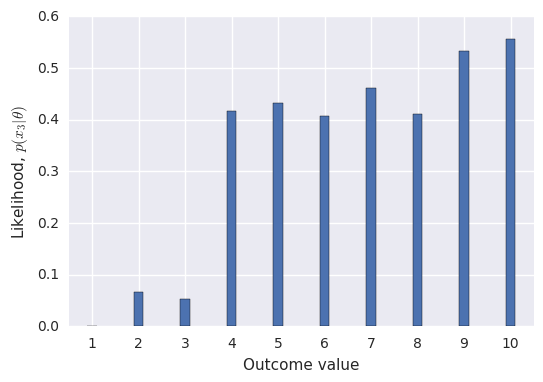

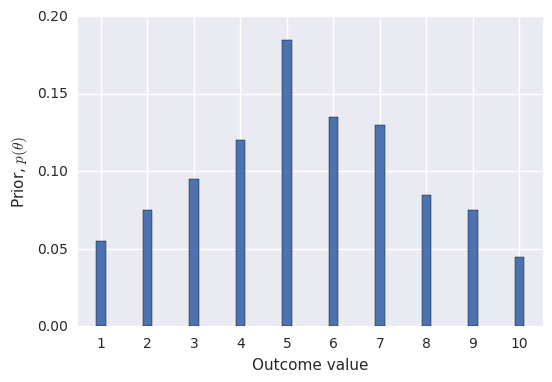

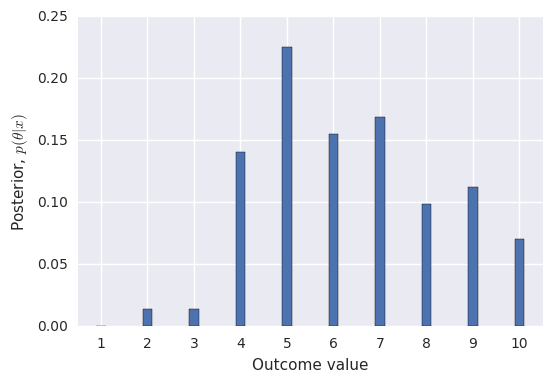

In [8]:
# See Code Example 3.1 for definitions.
N = np.sum(n)                       # Get total number of counts.
ps = n/N                            # Make counts into proportions.
nTHETA = np.sum(n,axis=0)           # create a row, with all column sums 

# Set graph parameters.
width = 0.2                 
theta_values = range(1,11)

# Find likelihood function.
nx3ANDTHETA = n[2,:]               # Get theta values at x=3.
px3GTHETA = nx3ANDTHETA/nTHETA     # Likelihood p(x=3|theta).
# Plot likelihood function.
plt.figure("Figure 7a")
plt.bar(theta_values, px3GTHETA, width=width,align='center')
plt.xticks(theta_values, theta_values)
#  Add space to bar on left and right.
plt.xlim([min(theta_values)-0.5, max(theta_values)+0.5]) 
plt.xlabel("Outcome value")
plt.ylabel("Likelihood, $p(x_3|\\theta)$")

# Get prior distribution.
pTHETA = nTHETA/N                  # Prior distribution.
# Plot prior distribution.
plt.figure("Figure 7b")
plt.bar(theta_values, pTHETA, width=width,align='center')
plt.xticks(theta_values, theta_values)
plt.xlim([min(theta_values)-0.5, max(theta_values)+0.5]) 
plt.xlabel("Outcome value")
plt.ylabel("Prior, $p(\\theta)$")

# Find posterior distribution.
nx3 = np.sum(n[2,:])                # Number of counts in row x=3.
px3 = nx3/N                         # Marginal probability p(x3)
pTHETAGx3 = px3GTHETA*pTHETA/px3    # Posterior distribution.
# Plot posterior distribution.
plt.figure("Figure 7c")
plt.bar(theta_values, pTHETAGx3, width=width,align='center')
plt.xticks(theta_values, theta_values)
plt.xlim([min(theta_values)-0.5, max(theta_values)+0.5]) 
plt.xlabel("Outcome value")
plt.ylabel("Posterior, $p(\\theta|x)$")
plt.show()


- ### 3.2 Continous Parameter Values

#### Use this formula in continuous case: 
$$P(\theta|X)=\frac{P(X|\theta)P(\theta)}{P(X)}$$
$$P(X) = \int P(X,\theta)d\theta = \int P(X|\theta)P(\theta)d\theta$$
#### P(X) is just a normalization term, it does not change the shape of the posterior distribution, so we can ignore it for now. 
##### One thing to keep in mind is, here X stands for the data we observed. latter on we will see the mariginal distribution of X, in that case, X is all possible data we can observe, and the distribution stands for the likelihood that we observe the data we see. 

- #### Sample question 
##### Consider a coin with a bias of $\theta_{true}$ = 0.6 (ie it lands heads-up 60% of the time) that is flipped a total of N = 10 times. Suppose that each of the first 7 outcomes is a head $x_h$, and each of the final 3 outcomes is a tail $x_t$. If we do not know the true $\theta$, how do we estimate $\theta$?

- ### First, lets see how frequentist solve the problem. Basically use the maxium likelyhood to estimate $\theta$
the likelyhood function for a bernoulli distribution random variables is $f(x|\theta)=p^{x}(1-p)^{n-x}$ for $\theta \in \{0,1\}$  

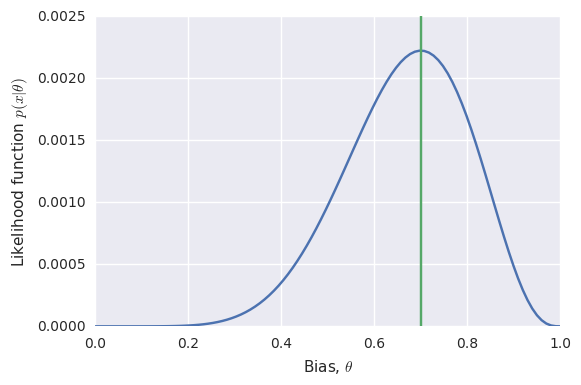

$\theta^hat$ using MLE is: 0.7. This this method ignored any prior knowledge, if we had any.


In [18]:
# Define vector of values for theta.
THETA = np.linspace(0.0, 1.0,100)
# Find likelihood function from Eq 4.9.
pxGTHETA = THETA**7 * (1.0-THETA)**3
# Plot likelihood function, Figure 4.1.
plt.figure("Figure 4.1")
plt.plot(THETA,pxGTHETA)                             ## plot the distribution 
plt.plot((0.7, 0.7), (0, 0.0025))                    ## add a vertical line
plt.xlabel("Bias, $\\theta$")  
plt.ylabel("Likelihood function $p(x|\\theta)$")
plt.show()
print ("$\\theta^hat$ using MLE is: 0.7. This this method ignored any prior knowledge, if we had any.")

- ### Use bayesian method: first, lets just assume a uniform distribution prior that $\theta$ = 0.7

#### From this graph we can see that a uniform prior does not change the likelyhood, it is essentially the same as frequentist way of calculating $\theta$ 

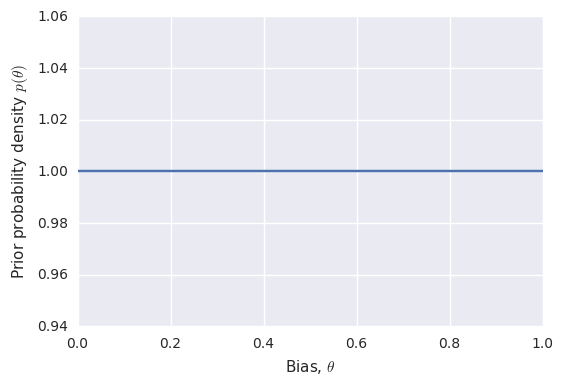

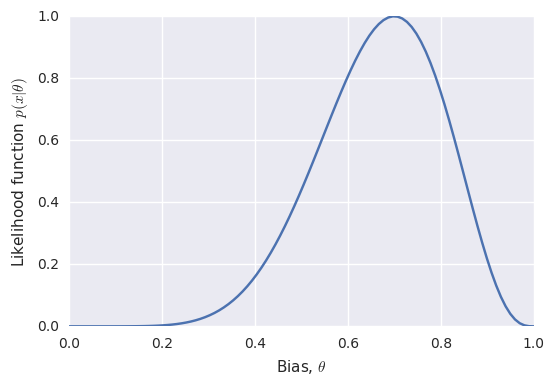

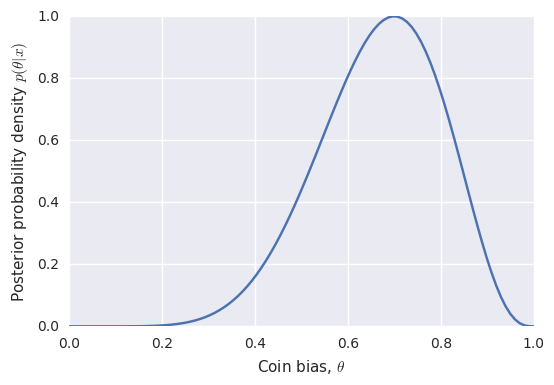

In [32]:
#########
## create the prior distribution 
########

# Define vector of values for theta.
THETA = np.linspace(0.0, 1.0,100)
# Find prior distribution from Eq 4.14.
pTHETA = scipy.stats.uniform(0, 1).pdf(THETA)
# Plot prior distribution, Figure 4.2b.
plt.figure("Figure a")
plt.plot(THETA,pTHETA)
plt.xlabel("Bias, $\\theta$")  
plt.ylabel("Prior probability density $p(\\theta)$")
plt.show()

#########
## create likelyhood distribution 
########
# Define vector of values for theta.
THETA = np.linspace(0.0, 1.0,100)
# Find likelihood function from Eq 4.9.
pxGTHETA = THETA**7 * (1.0-THETA)**3
# normalized it to be max 1
pxGTHETA = pxGTHETA/max(pxGTHETA)
# Plot likelihood function, Figure 4.1.
plt.figure("Figure b")
plt.plot(THETA,pxGTHETA)                             ## plot the distribution 
plt.xlabel("Bias, $\\theta$")  
plt.ylabel("Likelihood function $p(x|\\theta)$")
plt.show()

#########
## create posterior distribution 
########

# Find posterior distribution, Equation 4.17.
pTHETAGx = THETA**7 * (1.0-THETA)**3*pTHETA
# Set max value to 1, for graph.
pTHETAGx = pTHETAGx/max(pTHETAGx)
# Plot posterior distribution, Figure 4.3c.
plt.figure("Figure c")
plt.plot(THETA,pTHETAGx)
plt.xlabel("Coin bias, $\\theta$")  
plt.ylabel("Posterior probability density $p(\\theta|x)$")
plt.show()

#### From this graph we can see that a uniform prior does not change the likelyhood, it is essentially the same as frequentist way of calculating $\theta$ 

- ### Now, lets try a different prior distribution:  $$P(\theta)=\theta^2(1-\theta^2)$$


#### From the charts we can see that, different prior will yield different posterior. Our point estimate will be closer to 0.6 which is the true $\theta$

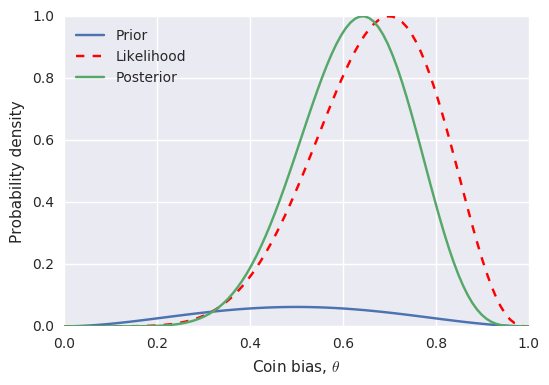

In [44]:
# Define vector of values for theta.
THETA = np.linspace(0.0, 1.0,100)

#########
## create the prior distribution 
########

# Find prior distribution
pTHETA = THETA**2*(1-THETA)**2
# Plot prior distribution, Figure 4.2b.
plt.figure("Figure Baysian Network")
plt.plot(THETA,pTHETA,label='Prior')

#########
## create likelyhood distribution 
########

# Find likelihood function
pxGTHETA = THETA**7 * (1.0-THETA)**3
# Set max value to 1, for graph.
pxGTHETA = pxGTHETA/max(pxGTHETA)
# Plot likelihood function, Figure 4.1.
#plt.figure("Figure b")
plt.plot(THETA,pxGTHETA,'r--',label='Likelihood')                             ## plot the distribution 

#########
## create posterior distribution 
########

# Find posterior distribution
pTHETAGx = THETA**7 * (1.0-THETA)**3*THETA**2*(1-THETA)**2        ## using Bayes rule, get the posterior distribution 
# Set max value to 1, for graph.
pTHETAGx = pTHETAGx/max(pTHETAGx)
# Plot posterior distribution, Figure 4.3c.
plt.plot(THETA,pTHETAGx,label='Posterior')
plt.xlabel("Coin bias, $\\theta$")  
plt.ylabel("Probability density")
plt.legend(loc='best')
plt.show()

- #### Now, what about posterior interval estimates: for instance what is the P($\theta > 0.5$) or P($0.4<\theta<0.6$)?

In [63]:
from sympy import *
init_printing(use_latex=True)

## another example 
theta = symbols('theta')
expr = theta**7 * (1-theta)**3*theta**2*(1-theta)**2 
p0406 = N(integrate(expr,(theta,0.4,0.6))/integrate(expr,(theta,0,1)))
p05 =  N(integrate(expr,(theta,0.5,1))/integrate(expr,(theta,0,1)))
interval95 = N(integrate(expr,(theta,0.5,1))/integrate(expr,(theta,0,1)))
print('P(theta is between 0.4 and 0.6) = %.2f' % p0406)
print('P(theta is biggerthan 0.5) = %.2f' % p05)

P(theta is between 0.4 and 0.6) = 0.37
P(theta is biggerthan 0.5) = 0.85
